 Calories_consumed-> predict weight gained using calories consumed.
    Do the necessary transformations for input variables for getting better R^2 value for the model prepared.


In [15]:
import pandas as pd ## importing necessary libraries pandas

In [16]:
import numpy as np

In [17]:
import matplotlib.pyplot as plt

 reading a csv file using pandas library

In [18]:
calories=pd.read_csv(r"C:\Users\SAKET NANDAN\Documents\excel_R_lms\simple linear assignment excelR\calories_consumed.csv")

In [19]:
calories.columns

Index(['Weight_gained_in_grams', 'Calories_consumed'], dtype='object')

(array([6., 2., 2., 0., 0., 1., 1., 0., 1., 1.]),
 array([  62. ,  165.8,  269.6,  373.4,  477.2,  581. ,  684.8,  788.6,
         892.4,  996.2, 1100. ]),
 <a list of 10 Patch objects>)

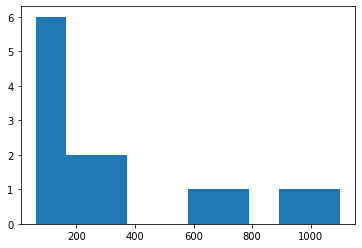

In [20]:
plt.hist(calories.Weight_gained_in_grams)

by above histogram we can conclude that our data is not normalized

{'whiskers': [<matplotlib.lines.Line2D at 0x28001b91988>,
 'caps': [<matplotlib.lines.Line2D at 0x28004d5a288>,
 'boxes': [<matplotlib.lines.Line2D at 0x28004deb688>],
 'medians': [<matplotlib.lines.Line2D at 0x28004d5dec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x28004d5d648>],
 'means': []}

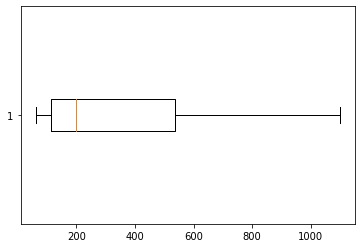

In [21]:
plt.boxplot(calories.Weight_gained_in_grams,0,"rs",0)

it is also shown that our data is not normalized

(array([3., 1., 2., 2., 1., 2., 1., 0., 1., 1.]),
 array([1400., 1650., 1900., 2150., 2400., 2650., 2900., 3150., 3400.,
        3650., 3900.]),
 <a list of 10 Patch objects>)

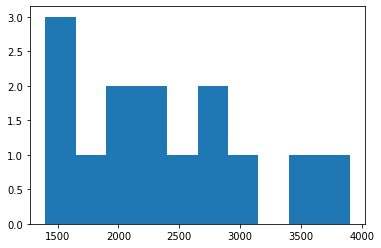

In [22]:
plt.hist(calories.Calories_consumed)

it shows that calories consumed is not normal

{'whiskers': [<matplotlib.lines.Line2D at 0x28004cb5c88>,
 'caps': [<matplotlib.lines.Line2D at 0x28004cbcf08>,
 'boxes': [<matplotlib.lines.Line2D at 0x28004cb5248>],
 'medians': [<matplotlib.lines.Line2D at 0x28004cc8bc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x28004cc8cc8>],
 'means': []}

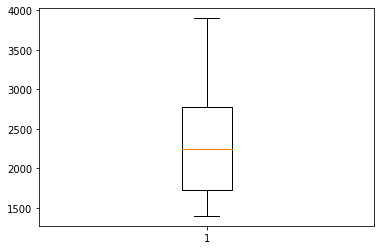

In [23]:
plt.boxplot(calories.Calories_consumed)

box blot also showing that calories consumed is not normalized

Text(0, 0.5, 'Weight_gained_in_grams')

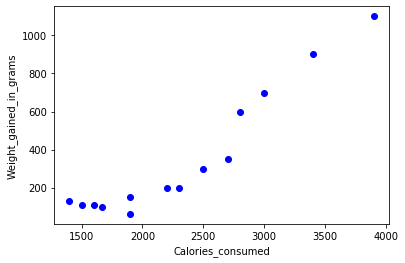

In [24]:
plt.plot(calories.Calories_consumed,calories.Weight_gained_in_grams,"bo");plt.xlabel("Calories_consumed");plt.ylabel("Weight_gained_in_grams")


# For preparing linear regression model we need to import the statsmodels.formula.api

In [25]:
import statsmodels.formula.api as smf

In [26]:
model=smf.ols("Weight_gained_in_grams~Calories_consumed",data=calories).fit()

 For getting coefficients of the varibles used in equation

In [27]:
model.params

Intercept           -625.752356
Calories_consumed      0.420157
dtype: float64

P-values for the variables and R-squared value for prepared model

In [28]:
model.summary()

C:\Users\SAKET NANDAN\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Weight_gained_in_grams   R-squared:                       0.897
Model:                                OLS   Adj. R-squared:                  0.888
Method:                     Least Squares   F-statistic:                     104.3
Date:                    Sun, 16 Feb 2020   Prob (F-statistic):           2.86e-07
Time:                            09:52:48   Log-Likelihood:                -84.792
No. Observations:                      14   AIC:                             173.6
Df Residuals:                          12   BIC:                             174.9
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -625.7524    100.823     -6.206      0.000    -845.427    -406.078
Calories_consumed     0.4202      0.041     10.211      0.000       0.331       0.510
==============================================================================
Omnibus:                        3.394   Durbin-Watson:                   2.537
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                1.227
Skew:                          -0.203   Prob(JB):                        0.541
Kurtosis:                       1.608   Cond. No.                     8.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
pred=model.predict(calories)

In [30]:
pred

0        4.482599
1      340.607908
2      802.780209
3      298.592245
4      424.639236
5       46.498263
6      -37.533065
7      172.545254
8      550.686227
9     1012.858527
10      75.909227
11     172.545254
12     508.670563
13     634.717554
dtype: float64

In [31]:
#pred = model.predict(calories.iloc[:,1]) # Predicted values of Weight_gained_in_grams using the model here we are predecting 
#weight_gained_grams using calories_consumed which is first column thats why i passed [:,1]

In [32]:
#pred=model.predict(pd.DataFrame(calories['Calories_consumed'])) #predicted values of Weight_gained_in_grams using the model
#here we r predicting Weight_ganed_in_grams using Calories_consumed 

In [33]:
resid_error=pred-calories.Weight_gained_in_grams

In [34]:
resid_error

0    -103.517401
1     140.607908
2     -97.219791
3      98.592245
4     124.639236
5     -63.501737
6    -165.533065
7     110.545254
8     -49.313773
9     -87.141473
10    -24.090773
11     22.545254
12    158.670563
13    -65.282446
dtype: float64

In [35]:
rmse_model=np.sqrt(np.mean(resid_error**2))

In [36]:
rmse_model

103.30250194726932

In [37]:
calories.Weight_gained_in_grams.corr(calories.Calories_consumed) # # correlation value between X and Y

0.9469910088554458

In [38]:
np.corrcoef(calories.Weight_gained_in_grams,calories.Calories_consumed)

array([[1.        , 0.94699101],
       [0.94699101, 1.        ]])

In [39]:
model.conf_int(0.05) # 95% confidence interval


,0,1
Intercept,-845.426655,-406.078057
Calories_consumed,0.330506,0.509807


 Visualization of regresion line over the scatter plot of Waist and AT
 For visualization we need to import matplotlib.pyplot

In [40]:
import matplotlib.pylab as plt

Text(0, 0.5, 'Weight_gained_in_grams')

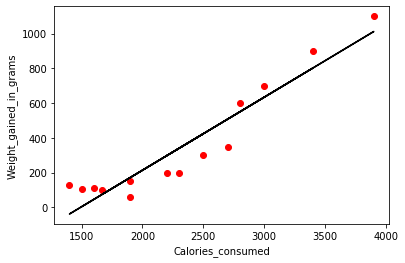

In [41]:
plt.scatter(x=calories['Calories_consumed'],y=calories['Weight_gained_in_grams'],color='red');plt.plot(calories['Calories_consumed'],pred,color='black');plt.xlabel('Calories_consumed');plt.ylabel('Weight_gained_in_grams')

In [28]:
pred.corr(calories.Weight_gained_in_grams)

0.9469910088554457

 Transforming variables for accuracy

In [29]:
model2 = smf.ols('Weight_gained_in_grams~np.log(Calories_consumed)',data=calories).fit()

In [30]:
model2.params

Intercept                   -6955.650125
np.log(Calories_consumed)     948.371723
dtype: float64

In [31]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Weight_gained_in_grams   R-squared:                       0.808
Model:                                OLS   Adj. R-squared:                  0.792
Method:                     Least Squares   F-statistic:                     50.40
Date:                    Sat, 15 Feb 2020   Prob (F-statistic):           1.25e-05
Time:                            21:35:05   Log-Likelihood:                -89.148
No. Observations:                      14   AIC:                             182.3
Df Residuals:                          12   BIC:                             183.6
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                 -6955.6501   1030.908     -6.747      0.000   -9201.806   -4709.494
np.log(Calories_consumed)   948.3717    133.580      7.100      0.000     657.325    1239.418
==============================================================================
Omnibus:                        3.265   Durbin-Watson:                   2.438
Prob(Omnibus):                  0.195   Jarque-Bera (JB):                1.139
Skew:                           0.046   Prob(JB):                        0.566
Kurtosis:                       1.606   Cond. No.                         199.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
pred2 = model2.predict(calories)

In [33]:
#pred2=model2.predict(pd.DataFrame(calories['Calories_consumed']))

In [34]:
#pred=model2.predict(calories.iloc[:,1])

In [35]:
pred2

0     -19.998702
1     385.377115
2     756.063670
3     343.220320
4     464.453875
5      41.207806
6     -85.429591
7     204.185731
8     571.931596
9     886.181334
10     81.817081
11    204.185731
12    537.441550
13    637.362484
dtype: float64

In [36]:
resid_error2=pred2-calories['Weight_gained_in_grams']

In [37]:
rmse_model2=np.sqrt(np.mean(resid_error2**2))

In [38]:
rmse_model2

141.0053816942511

In [39]:
pred2.corr(calories.Weight_gained_in_grams)

0.8987252805287712

its less than model1

Text(0, 0.5, 'Weight_gained_in_grams')

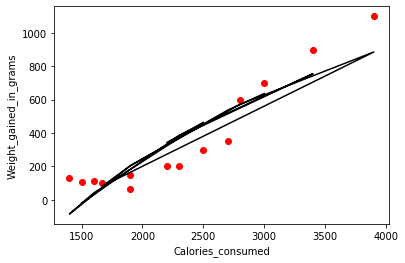

In [40]:
plt.scatter(x=calories['Calories_consumed'],y=calories['Weight_gained_in_grams'],color='red');plt.plot(calories['Calories_consumed'],pred2,color='black');plt.xlabel('Calories_consumed');plt.ylabel('Weight_gained_in_grams')

now we will develop Exponential transformation

In [41]:
model3 = smf.ols('np.log(Weight_gained_in_grams)~Calories_consumed',data=calories).fit()

In [42]:
model3.params

Intercept            2.838672
Calories_consumed    0.001134
dtype: float64

In [43]:
model3.summary() #its r-sq value is less than model

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     np.log(Weight_gained_in_grams)   R-squared:                       0.878
Model:                                        OLS   Adj. R-squared:                  0.867
Method:                             Least Squares   F-statistic:                     86.04
Date:                            Sat, 15 Feb 2020   Prob (F-statistic):           8.02e-07
Time:                                    21:36:51   Log-Likelihood:                -3.3244
No. Observations:                              14   AIC:                             10.65
Df Residuals:                                  12   BIC:                             11.93
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.8387      0.299      9.479      0.000       2.186       3.491
Calories_consumed     0.0011      0.000      9.276      0.000       0.001       0.001
==============================================================================
Omnibus:                       10.165   Durbin-Watson:                   3.130
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                6.120
Skew:                          -1.240   Prob(JB):                       0.0469
Kurtosis:                       5.083   Cond. No.                     8.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
print(model3.conf_int(0.01)) # 99% confidence level

                          0         1
Intercept          1.923966  3.753379
Calories_consumed  0.000760  0.001507


In [45]:
pred_log = model3.predict(pd.DataFrame(calories['Calories_consumed']))

In [46]:
#pred_log= model3.predict(calories.iloc[:,1])

In [47]:
#pred_log=model3.predict(calories)

In [48]:
pred_log

0     4.539069
1     5.445947
2     6.692904
3     5.332587
4     5.672666
5     4.652428
6     4.425709
7     4.992508
8     6.012745
9     7.259702
10    4.731780
11    4.992508
12    5.899386
13    6.239465
dtype: float64

In [49]:
pred3=np.exp(pred_log)  # as we have used log(Weight_gained_in_grams) in preparing model so we need to convert it back

In [50]:
pred3

0       93.603577
1      231.816603
2      806.661188
3      206.972681
4      290.808810
5      104.839263
6       83.572027
7      147.305340
8      408.603511
9     1421.833419
10     113.497427
11     147.305340
12     364.813232
13     512.584083
dtype: float64

In [51]:
pred3.corr(calories.Weight_gained_in_grams)

0.9437992041960713

Text(0, 0.5, 'Weight_gained_in_grams')

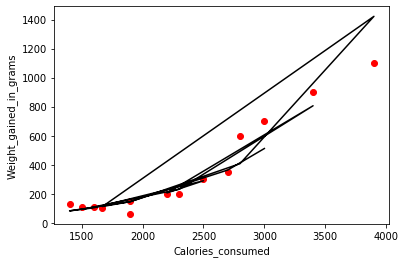

In [52]:
plt.scatter(x=calories['Calories_consumed'],y=calories['Weight_gained_in_grams'],color='red');plt.plot(calories['Calories_consumed'],pred3,color='black');plt.xlabel('Calories_consumed');plt.ylabel('Weight_gained_in_grams')

In [53]:
resid_model3 = pred3-calories.Weight_gained_in_grams

In [54]:
rmse_model3=np.sqrt(np.mean(resid_model3**2))

In [55]:
rmse_model3

118.04515720118025

aboves are the errors calculated from actual to predicted

In [56]:
#Quadratic model

calories["Calories_consumed_sq"] = calories.Calories_consumed*calories.Calories_consumed

In [57]:
print(calories)

    Weight_gained_in_grams  Calories_consumed  Calories_consumed_sq
0                      108               1500               2250000
1                      200               2300               5290000
2                      900               3400              11560000
3                      200               2200               4840000
4                      300               2500               6250000
5                      110               1600               2560000
6                      128               1400               1960000
7                       62               1900               3610000
8                      600               2800               7840000
9                     1100               3900              15210000
10                     100               1670               2788900
11                     150               1900               3610000
12                     350               2700               7290000
13                     700               3000   

In [58]:
model_quad = smf.ols("Weight_gained_in_grams~(Calories_consumed+Calories_consumed_sq)",data=calories).fit()

In [59]:
model_quad.params

Intercept               203.258458
Calories_consumed        -0.291894
Calories_consumed_sq      0.000140
dtype: float64

In [60]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Weight_gained_in_grams   R-squared:                       0.952
Model:                                OLS   Adj. R-squared:                  0.943
Method:                     Least Squares   F-statistic:                     109.2
Date:                    Sat, 15 Feb 2020   Prob (F-statistic):           5.55e-08
Time:                            21:37:22   Log-Likelihood:                -79.425
No. Observations:                      14   AIC:                             164.9
Df Residuals:                          11   BIC:                             166.8
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              203.2585    243.624      0.834      0.422    -332.955     739.472
Calories_consumed       -0.2919      0.202     -1.444      0.177      -0.737       0.153
Calories_consumed_sq     0.0001   3.92e-05      3.561      0.004    5.33e-05       0.000
==============================================================================
Omnibus:                        1.621   Durbin-Watson:                   3.058
Prob(Omnibus):                  0.445   Jarque-Bera (JB):                0.996
Skew:                           0.324   Prob(JB):                        0.608
Kurtosis:                       1.865   Cond. No.                     8.12e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.12e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
pred_quad = model_quad.predict(calories)

In [62]:
#pred_quad = model_quad.predict(calories.iloc[:,1:3])

In [63]:
pred_quad

0       79.333455
1      269.953635
2      823.649454
3      236.359838
4      345.512323
5       93.394702
6       68.062571
7      152.320630
8      479.778088
9     1186.943943
10     104.897842
11     152.320630
12     432.232469
13     583.240419
dtype: float64

In [64]:
resid_error_model_quad=pred_quad-calories['Weight_gained_in_grams']

In [65]:
rmse_model_quad=np.sqrt(np.mean(resid_error_model_quad**2))

In [66]:
rmse_model_quad

70.40751529831556

In [67]:
#                    r_sq      adj_r_sq     Aic     p_value             Rmse_value
#model               0.897     0.888        173     0.331               103.30
#model2              0.808     0.792        183     0.000               141.005
#model3              0.878     0.867        10.65   0.000               118.045
#model_quad          0.952     0.943        164.9   x=0.177,x^2=0.004   70.4075

so from abobe we can conclude that our best model model3 or model_quad are good so we can will go for rmse_value in 
which model_quad have small value

In [68]:
student_resid = model_quad.resid_pearson 

In [69]:
student_resid

array([ 0.36090148, -0.88069107,  0.96122588, -0.45775726, -0.57298376,
        0.20905472,  0.75459064, -1.13710421,  1.51355057, -1.09459293,
       -0.06166207, -0.0292159 , -1.03527717,  1.46996107])

Text(0, 0.5, 'Standardized Residual')

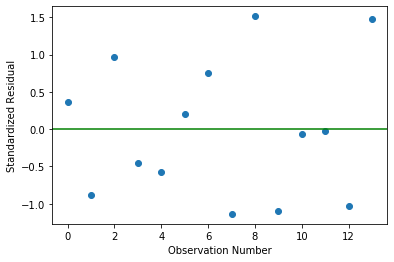

In [79]:
plt.plot(model_quad.resid_pearson,'o');plt.axhline(y=0,color='green');plt.xlabel("Observation Number");plt.ylabel("Standardized Residual")

in above graph if garph of standardized error is constant with observatin number is constant .so,on increasing no of observation our residual error will be constant so model_quad is fine according to our above graph

Text(0, 0.5, 'Actual')

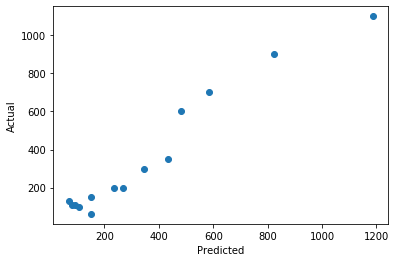

In [83]:
# Predicted vs actual values
plt.scatter(x=pred_quad,y=calories.Weight_gained_in_grams);plt.xlabel("Predicted");plt.ylabel("Actual")

in above graph prediction versus actual is linear graph so it shows that prediction which we have done is very good